In [1]:
import os
import zipfile
import scipy.io as sio

# Specifica la directory che contiene i file zip
data_folder = r"C:\Users\Edoardo PC\Desktop\Aerodynamic flows\data"

# Ottiene la lista dei file zip presenti nella cartella
zip_files = [f for f in os.listdir(data_folder) if f.endswith(".zip")]
print("File zip trovati:", zip_files)

# Directory dove verranno estratti i file
extract_dir = "estratti"
os.makedirs(extract_dir, exist_ok=True)

# Dizionario per salvare i dati caricati dai file .mat
data_all = {}

# Itera su ogni file zip ed estrae i contenuti
for zip_file in zip_files:
    zip_path = os.path.join(data_folder, zip_file)
    print(f"Estraendo i file da: {zip_path}")
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_dir)

# Itera nella cartella degli estratti per caricare i file .mat
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file.endswith(".mat"):
            filepath = os.path.join(root, file)
            print("Caricamento del file:", filepath)
            try:
                mat_data = sio.loadmat(filepath, squeeze_me=True)
                data_all[file] = mat_data
            except Exception as e:
                print(f"Errore nel caricamento di {filepath}: {e}")

print("Totale file .mat caricati:", len(data_all))


File zip trovati: ['B101.zip', 'B106_pt_1.zip', 'B106_pt_10.zip', 'B106_pt_2.zip', 'B106_pt_3.zip', 'B106_pt_4.zip', 'B106_pt_5.zip', 'B106_pt_6.zip', 'B106_pt_7.zip', 'B106_pt_8.zip', 'B106_pt_9.zip', 'B109_pt_1.zip', 'B109_pt_10.zip', 'B109_pt_2.zip', 'B109_pt_3.zip', 'B109_pt_4.zip', 'B109_pt_5.zip', 'B109_pt_6.zip', 'B109_pt_7.zip', 'B109_pt_8.zip', 'B109_pt_9.zip']
Estraendo i file da: C:\Users\Edoardo PC\Desktop\Aerodynamic flows\data\B101.zip
Estraendo i file da: C:\Users\Edoardo PC\Desktop\Aerodynamic flows\data\B106_pt_1.zip
Estraendo i file da: C:\Users\Edoardo PC\Desktop\Aerodynamic flows\data\B106_pt_10.zip
Estraendo i file da: C:\Users\Edoardo PC\Desktop\Aerodynamic flows\data\B106_pt_2.zip
Estraendo i file da: C:\Users\Edoardo PC\Desktop\Aerodynamic flows\data\B106_pt_3.zip
Estraendo i file da: C:\Users\Edoardo PC\Desktop\Aerodynamic flows\data\B106_pt_4.zip
Estraendo i file da: C:\Users\Edoardo PC\Desktop\Aerodynamic flows\data\B106_pt_5.zip
Estraendo i file da: C:\Users

In [5]:
def explore_folder(folder_path):
    # Costruisce il percorso per il file header.mat
    header_path = os.path.join(folder_path, 'Header.mat')

    # Carica il file header
    header = sio.loadmat(header_path, squeeze_me=True)
    print("Chiavi nel file Header.mat:", header.keys())

    # Trova tutti i file channel*.mat nella cartella
    channel_files = [f for f in os.listdir(folder_path) if f.startswith('Channel') and f.endswith('.mat')]
    print("Numero di file channel trovati in {}: {}".format(folder_path, len(channel_files)))

    # Carica un file channel di esempio
    if channel_files:
        sample_channel_path = os.path.join(folder_path, channel_files[0])
        sample_channel = sio.loadmat(sample_channel_path, squeeze_me=True)
        print("Chiavi nel file {}: {}".format(channel_files[0], sample_channel.keys()))
    else:
        print("Nessun file channel trovato in questa cartella.")

    return header, channel_files


Chiavi nel file Header.mat: dict_keys(['__header__', '__version__', '__globals__', 'header'])
Numero di file channel trovati in estratti\B101: 62
Chiavi nel file Channel1.mat: dict_keys(['__header__', '__version__', '__globals__', 'singleData'])


Contenuto di header (Header.mat):
(5, 12288000, 62, 32768, 'Baseband', 'Continuous', 0, 92876.8, 4.8828125e-06, 100, '0/0/0', '0:0:0', array([2.69447251e+02, 2.69239027e+02, 2.68651150e+02, 2.69082949e+02,
       2.68771414e+02, 2.69054907e+02, 2.68865842e+02, 2.69326017e+02,
       2.68916729e+02, 2.67985511e+02, 2.68746192e+02, 2.69209343e+02,
       2.69440298e+02, 2.69654130e+02, 2.68837618e+02, 2.69431320e+02,
       2.68977361e+02, 2.68952647e+02, 2.69286163e+02, 2.69205647e+02,
       2.69097446e+02, 2.69230423e+02, 2.68797655e+02, 2.69355603e+02,
       2.68907681e+02, 2.69735005e+02, 2.69339307e+02, 2.68943034e+02,
       2.68959622e+02, 2.69180853e+02, 2.69637961e+02, 2.69196324e+02,
       2.68860570e+02, 2.69382945e+02, 2.69009096e+02, 2.68407363e+02,
       2.69368795e+02, 2.71638373e+02, 2.69279317e+02, 2.68267251e+02,
       2.68350066e+02, 2.68730111e+02, 2.69083167e+02, 2.68992442e+02,
       2.68952573e+02, 2.68665253e+02, 2.69916528e+02, 2.65707951e+02,
       2.6893

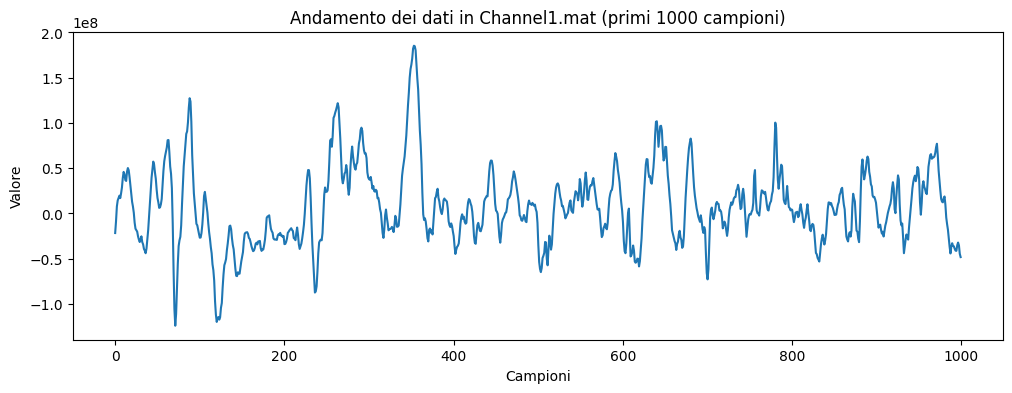

In [6]:
def detailed_exploration(folder_path):
    # Carica il file header
    header_path = os.path.join(folder_path, 'Header.mat')
    header_data = sio.loadmat(header_path, squeeze_me=True)

    print("Contenuto di header (Header.mat):")
    # Stampa l'intero contenuto, oppure solo le chiavi e alcuni dettagli
    header = header_data['header']
    print(header)

    # Cerca tutti i file channel*.mat nella cartella
    channel_files = [f for f in os.listdir(folder_path) if f.startswith('Channel') and f.endswith('.mat')]
    print("\nNumero di file channel trovati in {}: {}".format(folder_path, len(channel_files)))

    # Carica un file channel di esempio
    if channel_files:
        sample_channel_file = channel_files[0]
        sample_channel_path = os.path.join(folder_path, sample_channel_file)
        sample_channel = sio.loadmat(sample_channel_path, squeeze_me=True)

        # Esamina il contenuto di "singleData"
        if 'singleData' in sample_channel:
            data = sample_channel['singleData']
            print("\nTipo di dati in singleData:", type(data))
            # Convertiamo in array NumPy per poter analizzare le dimensioni
            data = np.array(data)
            print("Dimensione dei dati in singleData:", data.shape)

            # Visualizza i primi 1000 campioni (se il dato è lungo abbastanza)
            plt.figure(figsize=(12,4))
            plt.plot(data[:1000])
            plt.title("Andamento dei dati in {} (primi 1000 campioni)".format(sample_channel_file))
            plt.xlabel("Campioni")
            plt.ylabel("Valore")
            plt.show()
        else:
            print("La chiave 'singleData' non è presente in", sample_channel_file)
    else:
        print("Nessun file channel trovato nella cartella.")

In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

# Legge il file Excel
sensor_df = pd.read_excel("Sensor locations.xlsx", header=1)

# Rinomina le colonne per avere nomi coerenti (ad esempio "Mic #" diventa "Sensor")
sensor_df.rename(columns={"Mic #": "Sensor", "x": "X", "y": "Y", "dx": "dx", "dy": "dy"}, inplace=True)

# Ordina i sensori per numero
sensor_df = sensor_df.sort_values(by="Sensor")

# Visualizza le prime righe per controllare
print(sensor_df.head())

# Definisci i limiti spaziali in base alle coordinate X e Y (in mm)
x_min, x_max = sensor_df["X"].min(), sensor_df["X"].max()
y_min, y_max = sensor_df["Y"].min(), sensor_df["Y"].max()

# Definisci la dimensione della griglia desiderata
grid_width, grid_height = 32, 32

# Calcola la dimensione di ciascuna cella della griglia in mm
dx_cell = (x_max - x_min) / grid_width
# Per dy, se alcuni sensori hanno dy=0, usiamo un valore minimo per evitare divisioni per zero
min_dy = sensor_df[sensor_df["dy"] > 0]["dy"].min() if any(sensor_df["dy"] > 0) else 1
dy_cell = (y_max - y_min) / grid_height

# Calcola le coordinate di griglia per ciascun sensore
sensor_df["grid_x"] = ((sensor_df["X"] - x_min) / dx_cell).astype(int)
sensor_df["grid_y"] = ((sensor_df["Y"] - y_min) / dy_cell).astype(int)

print("Dimensione della griglia:", grid_height, "x", grid_width)
print(sensor_df.head())


   Sensor   X  Y  dx  dy
0       1   0  0   3   0
1       2   3  0   3   0
2       3   6  0   3   0
3       4   9  0   3   0
4       5  12  0   3   0
Dimensione della griglia: 32 x 32
   Sensor   X  Y  dx  dy  grid_x  grid_y
0       1   0  0   3   0       4       2
1       2   3  0   3   0       5       2
2       3   6  0   3   0       5       2
3       4   9  0   3   0       5       2
4       5  12  0   3   0       5       2


In [9]:
def sensor_vector_to_image(sensor_vector, sensor_df, grid_shape=(grid_height, grid_width)):
    """
    Data un vettore di misurazioni (uno per ciascun sensore) e il dataframe dei sensori,
    restituisce un'immagine 2D dove ogni cella contiene il valore del sensore.
    Se più sensori cadono nella stessa cella, usiamo il valore del primo.
    """
    image = np.zeros(grid_shape, dtype=np.float32)
    for i, row in sensor_df.iterrows():
        gx = int(row["grid_x"])
        gy = int(row["grid_y"])
        # Forziamo l'indice a non superare il limite massimo
        gx = min(gx, grid_shape[1]-1)
        gy = min(gy, grid_shape[0]-1)
        if i < len(sensor_vector):
            image[gy, gx] = sensor_vector[i]
    return image


def segment_to_image(segment, sensor_df, grid_shape=(grid_height, grid_width)):
    """
    calcola la media temporale per ottenere un vettore
    e lo mappa in un'immagine 2D utilizzando le posizioni dei sensori.
    """
    sensor_vector = np.mean(segment, axis=0)
    image = sensor_vector_to_image(sensor_vector, sensor_df, grid_shape=grid_shape)
    return image[..., np.newaxis]  # Aggiungiamo la dimensione canale (1)


In [11]:
base_folder = r"estratti"  # Cartella contenente i dati (B101, B106_pt_*, B109_pt_*)

dataset_image = tf.data.Dataset.from_generator(
    lambda: segments_to_image(base_folder, common_channels=None, segment_length=32768, dtype=np.float32, grid_shape=(grid_height, grid_width)),
    output_types=(tf.float32, tf.float32),
    output_shapes=((grid_height, grid_width, 1), (grid_height, grid_width, 1))
)

def normalize_image(X, Y):
    X_min = tf.reduce_min(X)
    X_max = tf.reduce_max(X)
    X_norm = (X - X_min) / (X_max - X_min + 1e-8)
    Y_norm = (Y - X_min) / (X_max - X_min + 1e-8)
    return X_norm, Y_norm

dataset_image = dataset_image.map(normalize_image, num_parallel_calls=tf.data.AUTOTUNE)
dataset_image = dataset_image.shuffle(buffer_size=50).batch(16).prefetch(tf.data.AUTOTUNE)

for X_batch, Y_batch in dataset_image.take(1):
    print("Statistiche batch:")
    print("  X_batch: min =", tf.reduce_min(X_batch).numpy(), "max =", tf.reduce_max(X_batch).numpy())
    print("  Y_batch: min =", tf.reduce_min(Y_batch).numpy(), "max =", tf.reduce_max(Y_batch).numpy())

Elaboro cartella: B101
  Canali selezionati: 62; Campioni totali: 12287999; Segmenti: 374
Statistiche batch:
  X_batch: min = 0.0 max = 1.0
  Y_batch: min = 0.0 max = 1.0


In [12]:
def unet_2d(input_shape=(grid_height, grid_width, 1), num_filters=16, num_outputs=1):
    from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
    from tensorflow.keras.models import Model
    inputs = Input(shape=input_shape)
    c1 = Conv2D(num_filters, (3,3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(num_filters, (3,3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(num_filters*2, (3,3), activation='relu', padding='same')(p1)
    c2 = Conv2D(num_filters*2, (3,3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(num_filters*4, (3,3), activation='relu', padding='same')(p2)
    c3 = Conv2D(num_filters*4, (3,3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(num_filters*8, (3,3), activation='relu', padding='same')(p3)
    c4 = Conv2D(num_filters*8, (3,3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(num_filters*16, (3,3), activation='relu', padding='same')(p4)
    c5 = Conv2D(num_filters*16, (3,3), activation='relu', padding='same')(c5)

    u6 = UpSampling2D((2,2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(num_filters*8, (3,3), activation='relu', padding='same')(u6)
    c6 = Conv2D(num_filters*8, (3,3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2,2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(num_filters*4, (3,3), activation='relu', padding='same')(u7)
    c7 = Conv2D(num_filters*4, (3,3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2,2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(num_filters*2, (3,3), activation='relu', padding='same')(u8)
    c8 = Conv2D(num_filters*2, (3,3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2,2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(num_filters, (3,3), activation='relu', padding='same')(u9)
    c9 = Conv2D(num_filters, (3,3), activation='relu', padding='same')(c9)

    outputs = Conv2D(num_outputs, (1,1), activation='linear')(c9)
    model = Model(inputs=inputs, outputs=outputs)
    return model

model_2d = unet_2d(input_shape=(grid_height, grid_width, 1), num_filters=16, num_outputs=1)
model_2d.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])
model_2d.summary()

# Avvia il training
history = model_2d.fit(dataset_image, epochs=20, verbose=1)
model_2d.save('model_trained_2d')

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        160 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      2,320 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 16, 16,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 32)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 64)  │     18,496 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 64)  │     36,928 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 64)  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 4, 4, 128) │     73,856 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 4, 4, 128) │    147,584 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 2, 2, 128) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 2, 2, 256) │    295,168 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 2, 2, 256) │    590,080 │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 4, 4, 256) │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 4, 4, 384) │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │                   │            │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 4, 4, 128) │    442,496 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 4, 4, 128) │    147,584 │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,962,337 (7.49 MB)

 Trainable params: 1,962,337 (7.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
Elaboro cartella: B101
  Canali selezionati: 62; Campioni totali: 12287999; Segmenti: 374
     19/Unknown 34s 265ms/step - loss: 0.1235 - mae: 0.3305Elaboro cartella: B106_pt_1
     20/Unknown 34s 267ms/step - loss: 0.1229 - mae: 0.3297  Canali selezionati: 6; Campioni totali: 61439999; Segmenti: 1874
    135/Unknown 67s 280ms/step - loss: 0.0823 - mae: 0.2258Elaboro cartella: B106_pt_10
    137/Unknown 67s 280ms/step - loss: 0.0817 - mae: 0.2244  Canali selezionati: 8; Campioni totali: 61439999; Segmenti: 1874
    250/Unknown 104s 299ms/step - loss: 0.0593 - mae: 0.1677Elaboro cartella: B106_pt_2
    254/Unknown 105s 298ms/step - loss: 0.0588 - mae: 0.1663  Canali selezionati: 6; Campioni totali: 61439999; Segmenti: 1874
    363/Unknown 136s 294ms/step - loss: 0.0472 - mae: 0.1358Elaboro cartella: B106_pt_3
    371/Unknown 138s 293ms/step - loss: 0.0465 - mae: 0.1341  Canali selezionati: 6; Campioni totali: 61439999; Segmenti: 1874
    472/Unknown 167s 293ms/step - loss: 0.

C:\Users\Edoardo PC\miniconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


  Canali selezionati: 62; Campioni totali: 12287999; Segmenti: 374
  19/2366 ━━━━━━━━━━━━━━━━━━━━ 12:09 311ms/step - loss: 6.2235e-04 - mae: 0.0116Elaboro cartella: B106_pt_1
  20/2366 ━━━━━━━━━━━━━━━━━━━━ 12:30 320ms/step - loss: 6.1704e-04 - mae: 0.0115  Canali selezionati: 6; Campioni totali: 61439999; Segmenti: 1874
 135/2366 ━━━━━━━━━━━━━━━━━━━━ 12:04 325ms/step - loss: 4.4412e-04 - mae: 0.0100Elaboro cartella: B106_pt_10
 137/2366 ━━━━━━━━━━━━━━━━━━━━ 12:06 326ms/step - loss: 4.4324e-04 - mae: 0.0100  Canali selezionati: 8; Campioni totali: 61439999; Segmenti: 1874
 250/2366 ━━━━━━━━━━━━━━━━━━━━ 12:07 344ms/step - loss: 3.7086e-04 - mae: 0.0090Elaboro cartella: B106_pt_2
 254/2366 ━━━━━━━━━━━━━━━━━━━━ 12:03 343ms/step - loss: 3.6839e-04 - mae: 0.0090  Canali selezionati: 6; Campioni totali: 61439999; Segmenti: 1874
 363/2366 ━━━━━━━━━━━━━━━━━━━━ 11:15 337ms/step - loss: 3.1164e-04 - mae: 0.0079Elaboro cartella: B106_pt_3
 371/2366 ━━━━━━━━━━━━━━━━━━━━ 11:08 335ms/step - loss: 3.0

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=saved_model_trained_2d.

In [13]:
model_2d.save('model_trained_2d.keras')


Elaboro cartella: B101
  Canali selezionati: 62; Campioni totali: 12287999; Segmenti: 374
     20/Unknown 26s 201ms/step - loss: 6.0445e-05 - mae: 0.0027Elaboro cartella: B106_pt_1
  Canali selezionati: 6; Campioni totali: 61439999; Segmenti: 1874
    136/Unknown 48s 186ms/step - loss: 2.7722e-05 - mae: 0.0014Elaboro cartella: B106_pt_10
    137/Unknown 48s 186ms/step - loss: 2.7593e-05 - mae: 0.0014  Canali selezionati: 8; Campioni totali: 61439999; Segmenti: 1874
    253/Unknown 76s 213ms/step - loss: 1.8275e-05 - mae: 9.8320e-04Elaboro cartella: B106_pt_2
    254/Unknown 76s 212ms/step - loss: 1.8224e-05 - mae: 9.8100e-04  Canali selezionati: 6; Campioni totali: 61439999; Segmenti: 1874
    370/Unknown 106s 225ms/step - loss: 1.3923e-05 - mae: 7.9666e-04Elaboro cartella: B106_pt_3
    371/Unknown 106s 224ms/step - loss: 1.3895e-05 - mae: 7.9551e-04  Canali selezionati: 6; Campioni totali: 61439999; Segmenti: 1874
    487/Unknown 129s 218ms/step - loss: 1.1371e-05 - mae: 6.9033e-04El

C:\Users\Edoardo PC\miniconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


  Canali selezionati: 62; Campioni totali: 12287999; Segmenti: 374
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step


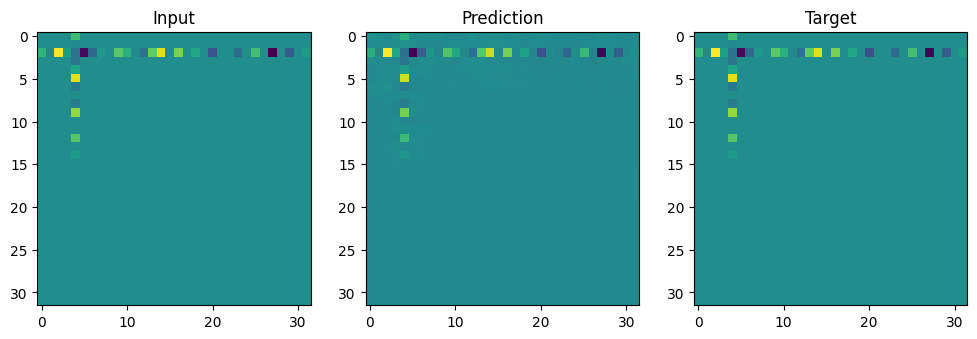

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Valutazione sul dataset
loss, mae = model_2d.evaluate(dataset_image)
print("Validation loss: ", loss)
print("Validation MAE: ", mae)

# Visualizzazione delle predizioni
for X_batch, Y_batch in dataset_image.take(1):
    predictions = model_2d.predict(X_batch)
    # Visualizza il primo campione del batch
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(X_batch[0,...,0], cmap='viridis')
    plt.title("Input")
    plt.subplot(1,3,2)
    plt.imshow(predictions[0,...,0], cmap='viridis')
    plt.title("Prediction")
    plt.subplot(1,3,3)
    plt.imshow(Y_batch[0,...,0], cmap='viridis')
    plt.title("Target")
    plt.show()